In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

- Output 2 adet kategoriden oluşuyorsa logistic_regressiona uygundur.

## 1-Read Data

In [2]:
data = pd.read_csv("data.csv") # diagnosis=B(benign=iyi huylu), M(malignant=kötü huylu) tümör
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.drop(["Unnamed: 32", "id"], axis=1, inplace = True) # axis=1 tüm sütunu drop et
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2-Preprocessing

In [5]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] # M or B => 1 or 0

In [6]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1)

## 3-Normalization

In [7]:
np.min(x_data)

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.049960
radius_se                    0.111500
texture_se                   0.360200
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.001713
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst            0.027290
concavity_wo

In [8]:
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values # 0-1 arasına tüm verileri convert eder

# (x - min(x))/(max(x)-min(x))

In [9]:
np.min(x)

radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

## 4-Split Data as Train and Test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) # random_state ile hep aynı rasgele sayılar gelir. 42=uğurlu sayı

x_train = x_train.T # her bir veriyi transposeunu alıyoruz. piksel mantığı
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 455)
x_test:  (30, 114)
y_train:  (455,)
y_test:  (114,)


## 5-Preparing Model: Logistic Regression

In [11]:
# dimension = 30 => yani 30 adet weight olmalı
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01) # 0.01'lerden oluşan 30x1 lik bir matris oluşturur.
    b = 0.0
    return w, b

In [12]:
#initialize_weights_and_bias(5) # Example 

In [13]:
def sigmoid(z):
    
    y_pred = 1/(1+ np.exp(-z))
    return y_pred


In [14]:
# print(sigmoid(0))

# 6- Create Model
## A) Forward and Backward Propagation

In [15]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation

    # 1-Find sum(z)
    z = np.dot(w.T, x_train) + b # matris çarpımı için T'unu alırız, formula= (w*x + b)

    # 2-Run z in sigmoid function.
    y_pred = sigmoid(z)

    # 3-Create log loss(error) function
    loss = -y_train*np.log(y_pred)-(1-y_train)*np.log(1-y_pred)

    # 4-The sum of the loss(error) functions returns the cost function.
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]=455  is for scaling (normalize)
    
    # 5-backward propagation (derivative=türev)
    derivative_weight = (np.dot(x_train,((y_pred-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_pred-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    # güncellenecek cost miktarı
    return cost, gradients # gradients: depoladığımız dictionary 

## B) Updating(Learning) Parameters

In [16]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion): # kaç kez forward ve backward yapacağını: number_of_iteration söyler.
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train,y_train)
        cost_list.append(cost) # tüm costları depolamak için kullanıyoruz(ileride analiz etmek için).

        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

        if i % 10 == 0: # her 10 adımda 1 cost_list2'de depolarız/her 10 adımda 1 gösteririz. Sayı önemli değil.
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

        # Eğitimin/güncelleme işleminin sonlanması gereken an => w ve b'nin türevleri 0'a yakın olduğunda eğitimi durdurabiliriz. Deneyerek number_of_iterarion değerini buluruz, önce 10, sonra 20 yazarız
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b} # bizim için önemli olan w, b değerleridir. Bunlar modeldir diyebiliriz.
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list # gradients ve cost_list birbiriyle dependent

# 7-Predict Data

In [17]:
def predict(w, b, x_test): # weight ve bias modelimizin mihenk taşları..
    # x_test is a input for forward propagation (çünkü veriseti, weights ve bias değerleri güncel)
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1])) # 1x114 ve 0'lardan oluşuyor. Dolduracağız.
    # if z is bigger than 0.5, our prediction is sign one (y_pred=1),(kötü huylu tümör)
    # if z is smaller than 0.5, our prediction is sign zero (y_pred=0), (iyi huylu tümör)
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction # şimdi bunu y_test ile karşılaştıracağız, bakalım ne kadar doğru diye

# 8-Logistic Regression

In [18]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)

    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    #Label'larını bilmeden predict ettiğim x_test'imin predict edilen label'ları, benim kanser hücrem iyi huylu mu kötü huylu mu?
    y_prediction_test = predict(parameters["weight"],parameters["bias"], x_test)

    # Print test Errors
    # y_prediction_test'i y_test ile karşılaşıtırırım. Farkını alıp, mutlak değerini ve ortalamasını alırsam accuracy'yi bulmuş oluruz. 
    # Control: pred=0, y_test:0 ise doğru, birisi 0, diğeri 1 ise sonuç yanlış olur. Vaktörler olduğu için mean alırız.
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.692977
Cost after iteration 10: 0.499667
Cost after iteration 20: 0.406616
Cost after iteration 30: 0.351936
Cost after iteration 40: 0.315762
Cost after iteration 50: 0.289862
Cost after iteration 60: 0.270257
Cost after iteration 70: 0.254795
Cost after iteration 80: 0.242214
Cost after iteration 90: 0.231722
Cost after iteration 100: 0.222796
Cost after iteration 110: 0.215080
Cost after iteration 120: 0.208317
Cost after iteration 130: 0.202324
Cost after iteration 140: 0.196961
Cost after iteration 150: 0.192121
Cost after iteration 160: 0.187722
Cost after iteration 170: 0.183698
Cost after iteration 180: 0.179997
Cost after iteration 190: 0.176577
Cost after iteration 200: 0.173402
Cost after iteration 210: 0.170443
Cost after iteration 220: 0.167676
Cost after iteration 230: 0.165080
Cost after iteration 240: 0.162638
Cost after iteration 250: 0.160334
Cost after iteration 260: 0.158155
Cost after iteration 270: 0.156091
Cost after iteration 280: 0.154

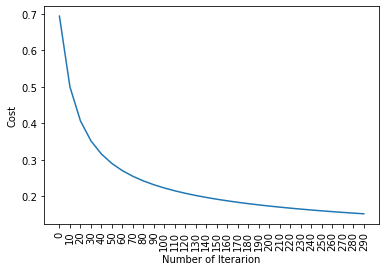

test accuracy: 96.49122807017544 %


In [21]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 1, num_iterations = 300) # num_iterations'u artırdık, learnin_rate'i azalttık, optimum değerini bulduk.

## 2. ve KOLAY YOL

In [23]:
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T) # original haline geri döndürüyorum

LogisticRegression()

In [26]:
# score: predict et, daha sonra benim için accuracy'yi bul, % kaçını predict etmiş?
print("test accuracy {}".format(lr.score(x_test.T, y_test.T)))

test accuracy 0.9824561403508771
